<a href="https://colab.research.google.com/github/havihaviplants/Artbox/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99_%EA%B8%B0%EC%83%81%EC%A0%95%EB%B3%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc -cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (29.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#데이터를 데이터프레임 형태로 읽어오기
df = pd.read_csv('기온.csv', encoding='cp949')
df.head(3)

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
0,108,서울,2023-01-01,-0.2,-4.3,2350,3.8,1343
1,108,서울,2023-01-02,-4.5,-7.4,804,-0.4,1525
2,108,서울,2023-01-03,-5.0,-9.0,551,0.6,1555


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   최저기온(°C)       365 non-null    float64
 5   최저기온 시각(hhmi)  365 non-null    int64  
 6   최고기온(°C)       365 non-null    float64
 7   최고기온 시각(hhmi)  365 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 22.9+ KB


In [ ]:
df2 = df.ffill()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   최저기온(°C)       365 non-null    float64
 5   최저기온 시각(hhmi)  365 non-null    int64  
 6   최고기온(°C)       365 non-null    float64
 7   최고기온 시각(hhmi)  365 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 22.9+ KB


In [ ]:
df2.rename(columns={'최저기온(c)' : 'min_temp'}, inplace=True)
df2.rename(columns={'평균기온(c)' : 'avg_temp'}, inplace=True)
df2.rename(columns={'최고기온(c)' : 'max_temp'}, inplace=True)
df2.head(3)

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
0,108,서울,2023-01-01,-0.2,-4.3,2350,3.8,1343
1,108,서울,2023-01-02,-4.5,-7.4,804,-0.4,1525
2,108,서울,2023-01-03,-5.0,-9.0,551,0.6,1555


KeyError: 'max_temp'

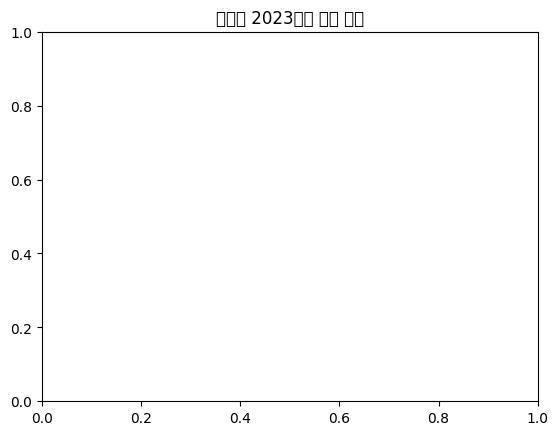

In [ ]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = 'False'

plt.title('서울시 2023년도 기온 변화')
plt.plot(range(1,len(df2)+1), df2['max_temp'], label ='최고기온', c='r')
plt.plot(range(1,len(df2)+1), df2['avg_temp'], label ='평균기온', c='y')
plt.plot(range(1,len(df2)+1), df2['min_temp'], label ='최저기온', c='b')

plt.xlbel('일')
plt.ylabel('기온')
plt.legend()
plt.show()